# project 1

In [12]:
import pandas as pd
df_superstore = pd.read_csv('Global_Superstore2.csv', encoding='latin1')
print("DataFrame loaded successfully. Displaying the first 5 rows:")
df_superstore.head()

DataFrame loaded successfully. Displaying the first 5 rows:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [13]:
print("Missing values before handling:")
print(df_superstore.isnull().sum())

Missing values before handling:
Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


In [14]:
print("Data type of 'Postal Code' column:", df_superstore['Postal Code'].dtype)

Data type of 'Postal Code' column: float64


In [15]:
df_superstore['Postal Code'].fillna(-1, inplace=True)
print("Missing values after handling:")
print(df_superstore.isnull().sum())

Missing values after handling:
Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Postal Code       0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64


/tmp/ipython-input-2424221852.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_superstore['Postal Code'].fillna(-1, inplace=True)


In [16]:
df_superstore['Postal Code'] = df_superstore['Postal Code'].fillna(-1)
print("Missing values after handling:")
print(df_superstore.isnull().sum())

Missing values after handling:
Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Postal Code       0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64


In [17]:
print(f"Number of duplicate rows before removal: {df_superstore.duplicated().sum()}")

Number of duplicate rows before removal: 0


In [18]:
df_superstore.drop_duplicates(inplace=True)
print("Duplicate rows removed (if any).")

Duplicate rows removed (if any).


In [19]:
print(f"Number of duplicate rows after removal: {df_superstore.duplicated().sum()}")

Number of duplicate rows after removal: 0


In [20]:
import numpy as np

# Identify numerical columns suitable for outlier detection
numerical_cols = ['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']

print("Numerical columns selected for outlier detection and handling:", numerical_cols)

# Loop through each numerical column to detect and handle outliers
for col in numerical_cols:
    print(f"\n--- Processing column: {col} ---")

    # Calculate Q1, Q3, and IQR
    Q1 = df_superstore[col].quantile(0.25)
    Q3 = df_superstore[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers before handling
    outliers_before = df_superstore[(df_superstore[col] < lower_bound) | (df_superstore[col] > upper_bound)].shape[0]
    print(f"Number of outliers in '{col}' before capping: {outliers_before}")

    # Cap outliers
    df_superstore[col] = np.where(df_superstore[col] < lower_bound, lower_bound, df_superstore[col])
    df_superstore[col] = np.where(df_superstore[col] > upper_bound, upper_bound, df_superstore[col])

    # Count outliers after handling
    outliers_after = df_superstore[(df_superstore[col] < lower_bound) | (df_superstore[col] > upper_bound)].shape[0]
    print(f"Number of outliers in '{col}' after capping: {outliers_after}")


Numerical columns selected for outlier detection and handling: ['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']

--- Processing column: Sales ---
Number of outliers in 'Sales' before capping: 5655
Number of outliers in 'Sales' after capping: 0

--- Processing column: Quantity ---
Number of outliers in 'Quantity' before capping: 877
Number of outliers in 'Quantity' after capping: 0

--- Processing column: Discount ---
Number of outliers in 'Discount' before capping: 4172
Number of outliers in 'Discount' after capping: 0

--- Processing column: Profit ---
Number of outliers in 'Profit' before capping: 9755
Number of outliers in 'Profit' after capping: 0

--- Processing column: Shipping Cost ---
Number of outliers in 'Shipping Cost' before capping: 5909
Number of outliers in 'Shipping Cost' after capping: 0


In [21]:
print("Descriptive statistics for numerical columns:")
print(df_superstore.describe())

Descriptive statistics for numerical columns:
            Row ID   Postal Code         Sales      Quantity      Discount  \
count  51290.00000  51290.000000  51290.000000  51290.000000  51290.000000   
mean   25645.50000  10753.194697    172.359178      3.438731      0.130049   
std    14806.29199  26042.343659    190.096672      2.147765      0.182638   
min        1.00000     -1.000000      0.444000      1.000000      0.000000   
25%    12823.25000     -1.000000     30.758625      2.000000      0.000000   
50%    25645.50000     -1.000000     85.053000      3.000000      0.000000   
75%    38467.75000     -1.000000    251.053200      5.000000      0.200000   
max    51290.00000  99301.000000    581.495063      9.500000      0.500000   

             Profit  Shipping Cost  
count  51290.000000   51290.000000  
mean      18.092440      16.711847  
std       39.851666      18.976267  
min      -55.215000       0.000000  
25%        0.000000       2.610000  
50%        9.240000       7.7

In [22]:
numerical_cols_for_corr = df_superstore.select_dtypes(include=['number']).columns
correlation_matrix = df_superstore[numerical_cols_for_corr].corr()
print("Correlation Matrix for Numerical Columns:")
print(correlation_matrix)

Correlation Matrix for Numerical Columns:
                 Row ID  Postal Code     Sales  Quantity  Discount    Profit  \
Row ID         1.000000     0.297433 -0.093579 -0.184755  0.039008 -0.045880   
Postal Code    0.297433     1.000000 -0.052705  0.063629  0.029526 -0.012824   
Sales         -0.093579    -0.052705  1.000000  0.357746 -0.110905  0.483261   
Quantity      -0.184755     0.063629  0.357746  1.000000 -0.006920  0.181680   
Discount       0.039008     0.029526 -0.110905 -0.006920  1.000000 -0.575859   
Profit        -0.045880    -0.012824  0.483261  0.181680 -0.575859  1.000000   
Shipping Cost -0.086618    -0.050894  0.890314  0.329105 -0.105130  0.441508   

               Shipping Cost  
Row ID             -0.086618  
Postal Code        -0.050894  
Sales               0.890314  
Quantity            0.329105  
Discount           -0.105130  
Profit              0.441508  
Shipping Cost       1.000000  


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries 'matplotlib.pyplot' and 'seaborn' imported successfully.")

Libraries 'matplotlib.pyplot' and 'seaborn' imported successfully.


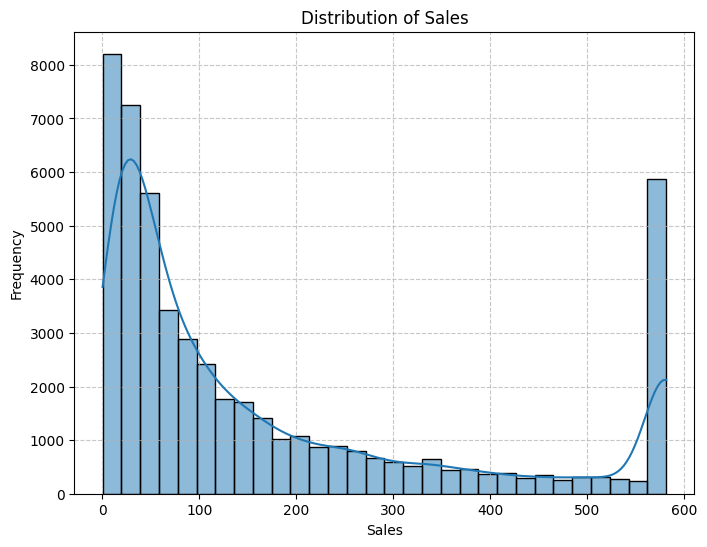

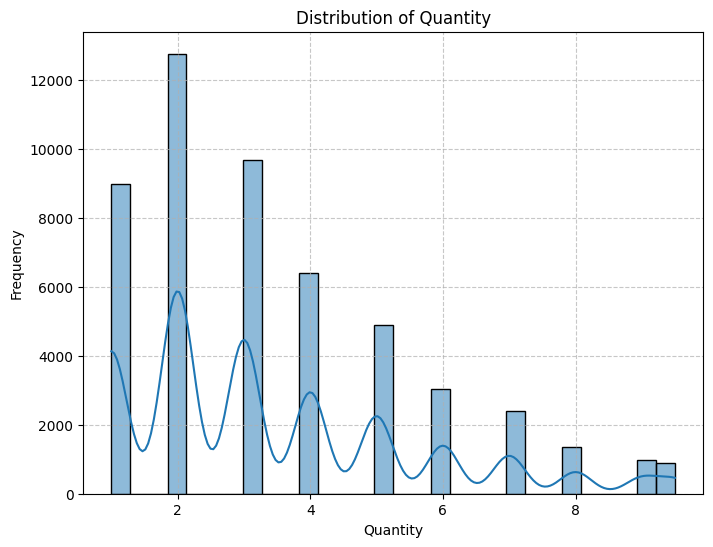

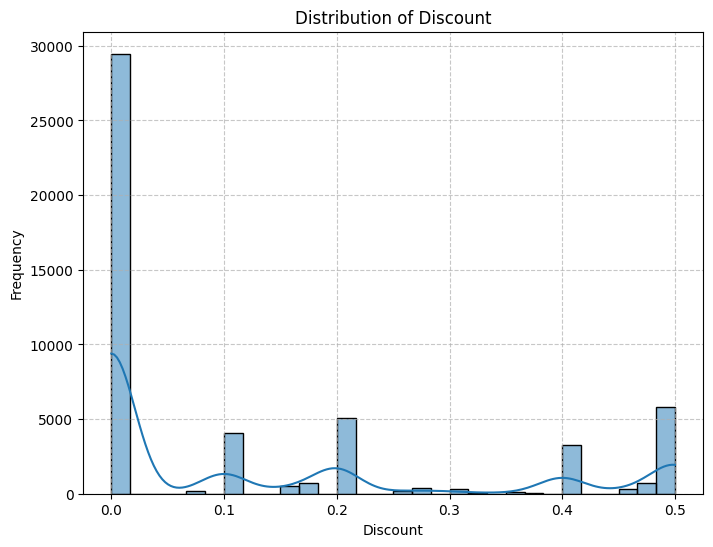

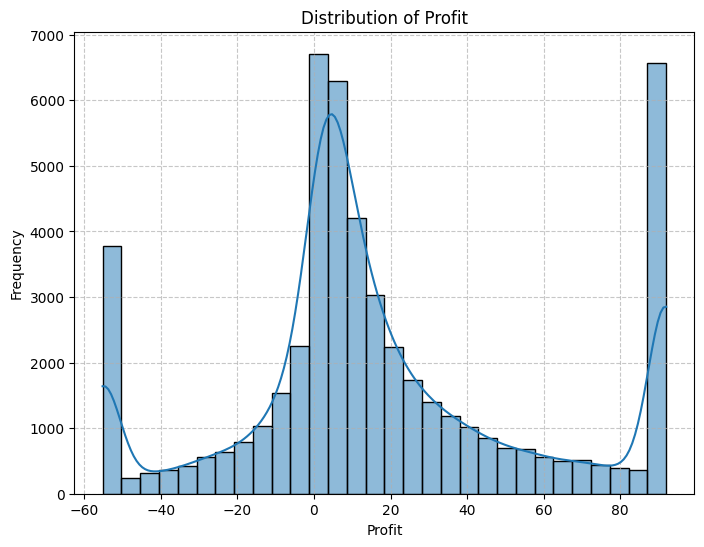

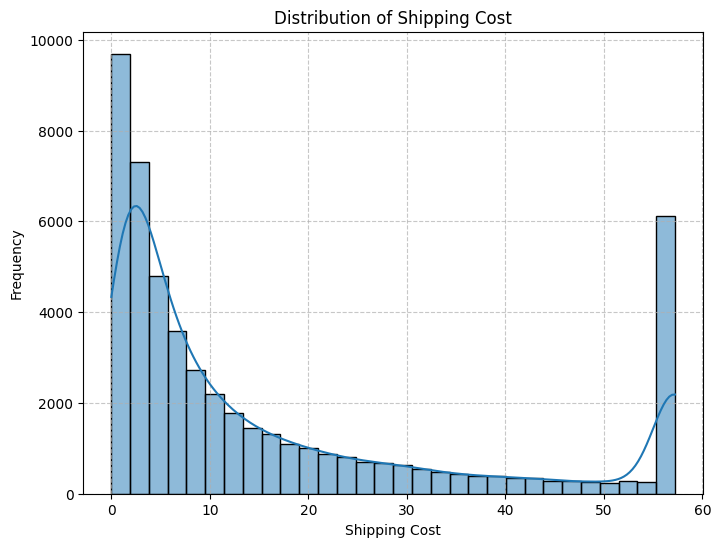

In [24]:
numerical_cols_for_hist = ['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']

for col in numerical_cols_for_hist:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_superstore[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

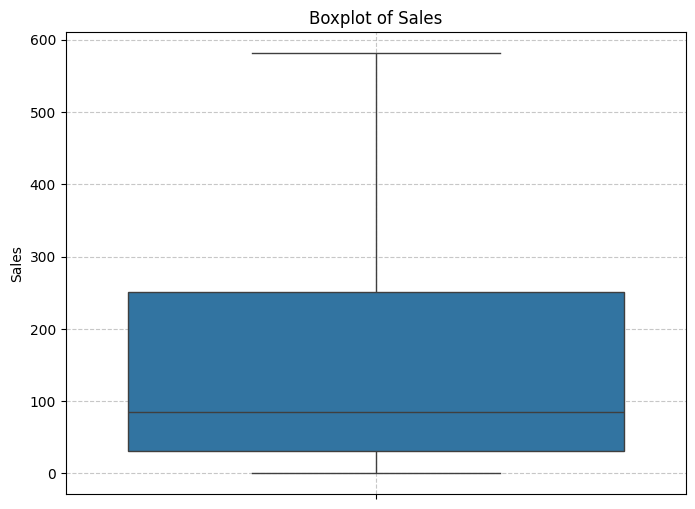

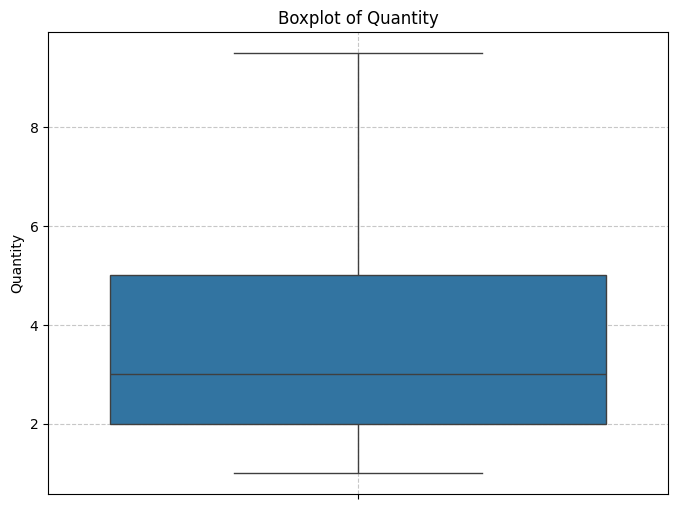

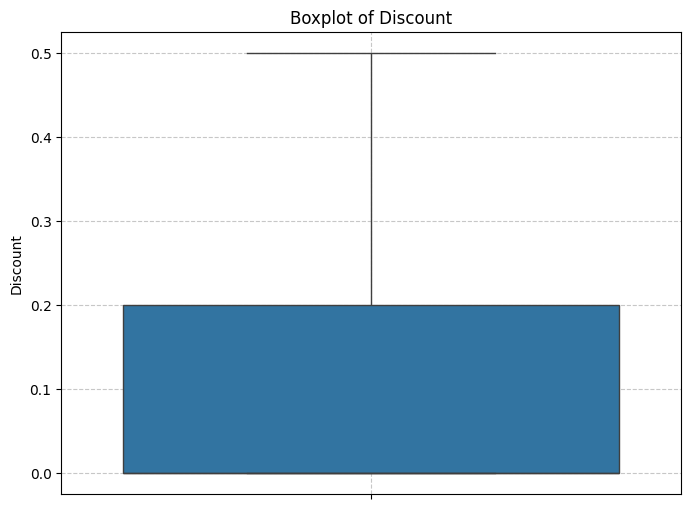

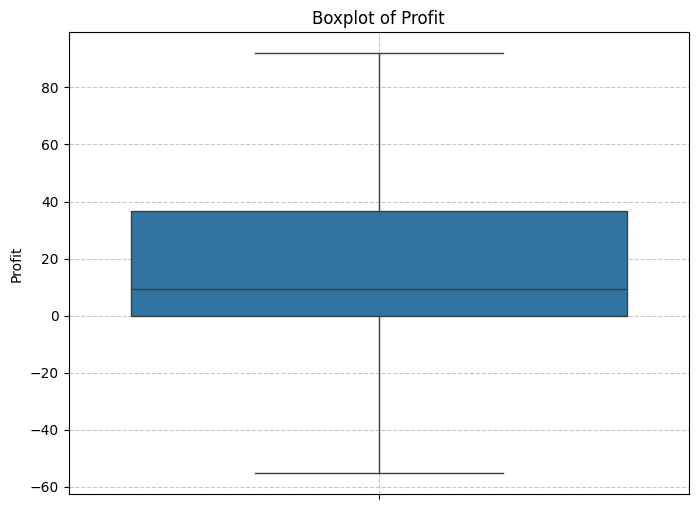

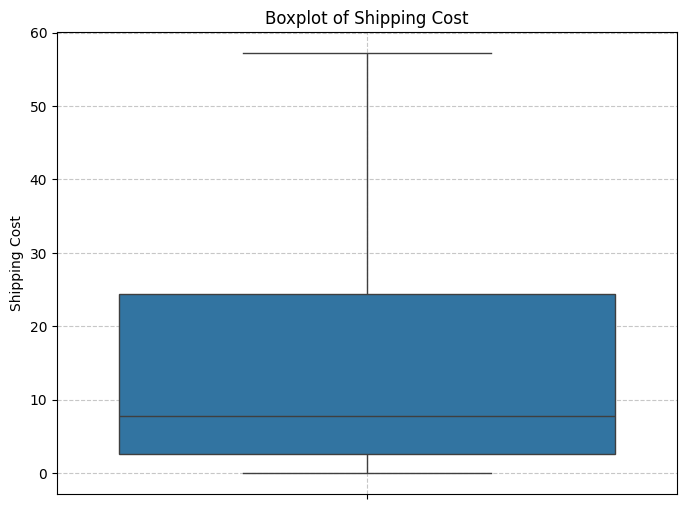

In [25]:
numerical_cols_for_boxplot = ['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']

for col in numerical_cols_for_boxplot:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df_superstore[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

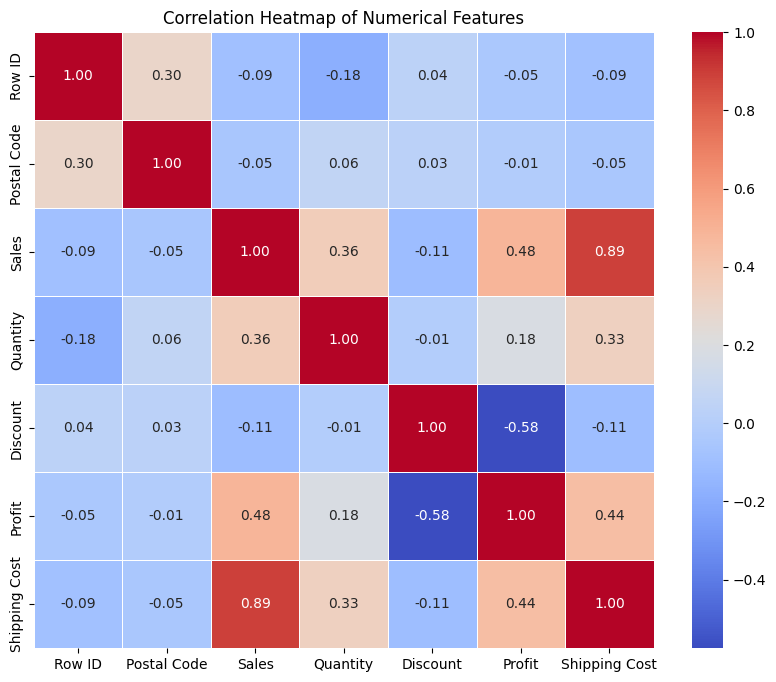

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# project 2


# Task
Convert the 'Order Date' column to datetime objects and then plot the total 'Sales' over time, labeling the axes and providing a title for the graph.

## Load and Explore Dataset

### Subtask:
Load the `sales_data.csv` dataset into a pandas DataFrame. Display its shape, data types, and check for initial missing values to understand the dataset's structure.


**Reasoning**:
The subtask requires loading the `sales_data.csv` file into a pandas DataFrame named `df_sales`. I will use `pd.read_csv` for this purpose and then display the first few rows to confirm successful loading.



In [27]:
df_sales = pd.read_csv('sales_data.csv')
print("DataFrame 'df_sales' loaded successfully. Displaying the first 5 rows:")
df_sales.head()

DataFrame 'df_sales' loaded successfully. Displaying the first 5 rows:


,date,Sales
0,2020-01-01,104.967142
1,2020-02-01,126.474500
2,2020-03-01,155.492441
3,2020-04-01,173.801727
4,2020-05-01,152.388308


**Reasoning**:
The next part of the subtask involves displaying the shape of the DataFrame, checking data types, and identifying missing values. This will be done using `df_sales.shape`, `df_sales.info()`, and `df_sales.isnull().sum()` respectively, to get a comprehensive understanding of the dataset's structure.



In [28]:
print(f"Shape of df_sales: {df_sales.shape}")
print("\nData types and non-null values:")
df_sales.info()
print("\nMissing values per column:")
print(df_sales.isnull().sum())

Shape of df_sales: (36, 2)

Data types and non-null values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    36 non-null     object 
 1   Sales   36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 708.0+ bytes

Missing values per column:
date     0
Sales    0
dtype: int64


## Remove Duplicates

### Subtask:
Identify and remove any duplicate rows from the dataset using drop_duplicates() to ensure data integrity.


**Reasoning**:
First, I will check for duplicate rows in `df_sales` to understand the current state of the DataFrame before attempting to remove any.



In [29]:
print(f"Number of duplicate rows before removal: {df_sales.duplicated().sum()}")

Number of duplicate rows before removal: 0


**Reasoning**:
Now that the number of duplicates before removal has been confirmed (which is 0 in this case), the next step is to use the `drop_duplicates(inplace=True)` method to remove any duplicate rows from the `df_sales` DataFrame.



In [30]:
df_sales.drop_duplicates(inplace=True)
print("Duplicate rows removed (if any).")

Duplicate rows removed (if any).


**Reasoning**:
To ensure data integrity, I will now verify that all duplicate rows have been successfully removed from the `df_sales` DataFrame by checking for duplicates again.



In [31]:
print(f"Number of duplicate rows after removal: {df_sales.duplicated().sum()}")

Number of duplicate rows after removal: 0


## Convert Date Column

### Subtask:
Convert the 'date' column in `df_sales` to a datetime object to facilitate time-series analysis.


**Reasoning**:
The subtask requires converting the 'date' column to datetime objects. This step will use `pd.to_datetime()` to perform the conversion and then print the DataFrame's data types to verify the change.



In [32]:
df_sales['date'] = pd.to_datetime(df_sales['date'])
print("Data types after converting 'date' column:")
print(df_sales.dtypes)

Data types after converting 'date' column:
date     datetime64[ns]
Sales           float64
dtype: object


## Handle Missing Values

### Subtask:
Identify columns with missing values and apply appropriate strategies to fill them (e.g., using mean or median for numerical columns).


## Handle Missing Values

### Subtask:
Identify columns with missing values and apply appropriate strategies to fill them (e.g., using mean or median for numerical columns).

**Reasoning**:
As per the instructions, I will re-check for missing values in `df_sales` using `df_sales.isnull().sum()`. While previous steps have already confirmed no missing values, this re-confirmation ensures data completeness for this specific subtask before proceeding.

**Reasoning**:
Now, I will execute the code to re-confirm that there are no missing values in the `df_sales` DataFrame, as indicated in the reasoning section of the previous markdown block.



In [33]:
print("Missing values per column after re-check:")
print(df_sales.isnull().sum())

Missing values per column after re-check:
date     0
Sales    0
dtype: int64


## Convert 'Order Date' to datetime in df_superstore

### Subtask:
Convert the 'Order Date' column in `df_superstore` to a datetime object, which is a prerequisite for plotting total 'Sales' over time for the superstore data.


**Reasoning**:
I will convert the 'Order Date' column in `df_superstore` to datetime objects using `pd.to_datetime()` and then print the DataFrame's data types to verify the successful conversion.



In [34]:
df_superstore['Order Date'] = pd.to_datetime(df_superstore['Order Date'], format='%d-%m-%Y')
print("Data types after converting 'Order Date' column:")
print(df_superstore.dtypes)

Data types after converting 'Order Date' column:
Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date                 object
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
City                      object
State                     object
Country                   object
Postal Code              float64
Market                    object
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                 float64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
dtype: object


## Plot Sales Over Time

### Subtask:
Generate a time series graph to visualize trends in 'Sales' over time. Ensure the plot includes appropriate labels, title, and legends.


**Reasoning**:
The first step is to group the `df_superstore` DataFrame by 'Order Date' and calculate the sum of 'Sales' for each date to prepare the data for time series plotting.



In [35]:
sales_over_time = df_superstore.groupby('Order Date')['Sales'].sum().reset_index()
print("Sales data grouped by Order Date. Displaying the first 5 rows:")
print(sales_over_time.head())

Sales data grouped by Order Date. Displaying the first 5 rows:
  Order Date        Sales
0 2011-01-01   808.563000
1 2011-01-02   314.220000
2 2011-01-03  3814.236388
3 2011-01-04  1741.925303
4 2011-01-05  1215.005063


**Reasoning**:
Now, I will create a line plot using the `sales_over_time` DataFrame to visualize the total sales trend over time, adding a descriptive title and appropriate axis labels for clarity as specified in the subtask instructions.



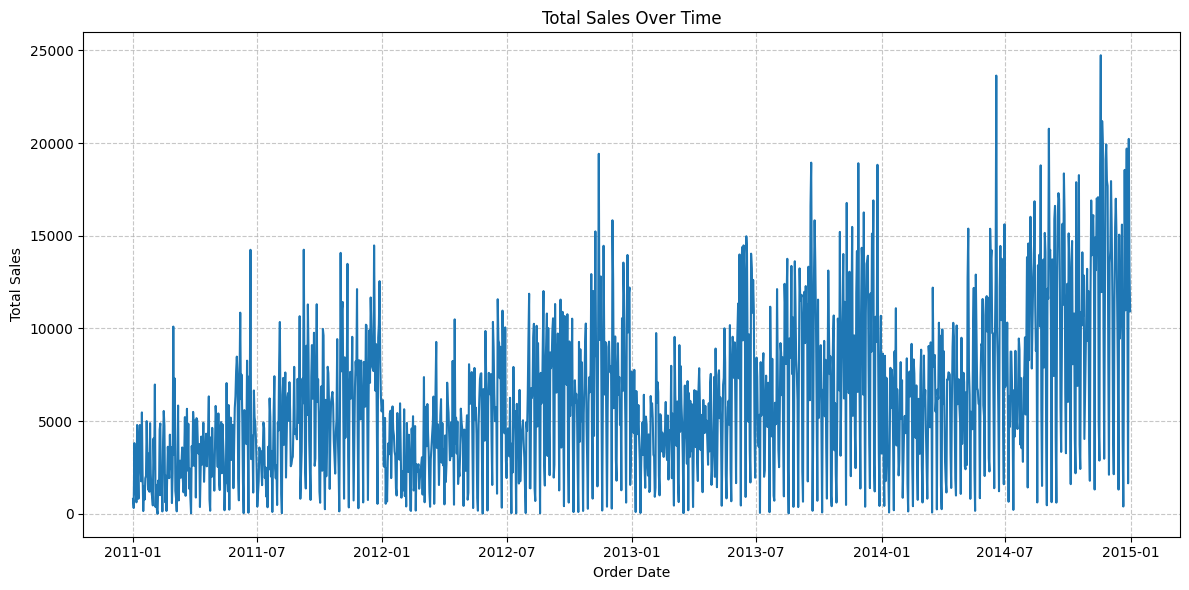

In [36]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_over_time, x='Order Date', y='Sales')
plt.title('Total Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Analyze Profit vs. Discount

### Subtask:
Create a scatter plot to study the relationship between 'Profit' and 'Discount'. Ensure the plot includes appropriate labels, title, and legends.


**Reasoning**:
To visualize the relationship between 'Profit' and 'Discount', I will create a scatter plot using `seaborn.scatterplot`, setting 'Discount' on the x-axis and 'Profit' on the y-axis, and include a title and axis labels as specified.



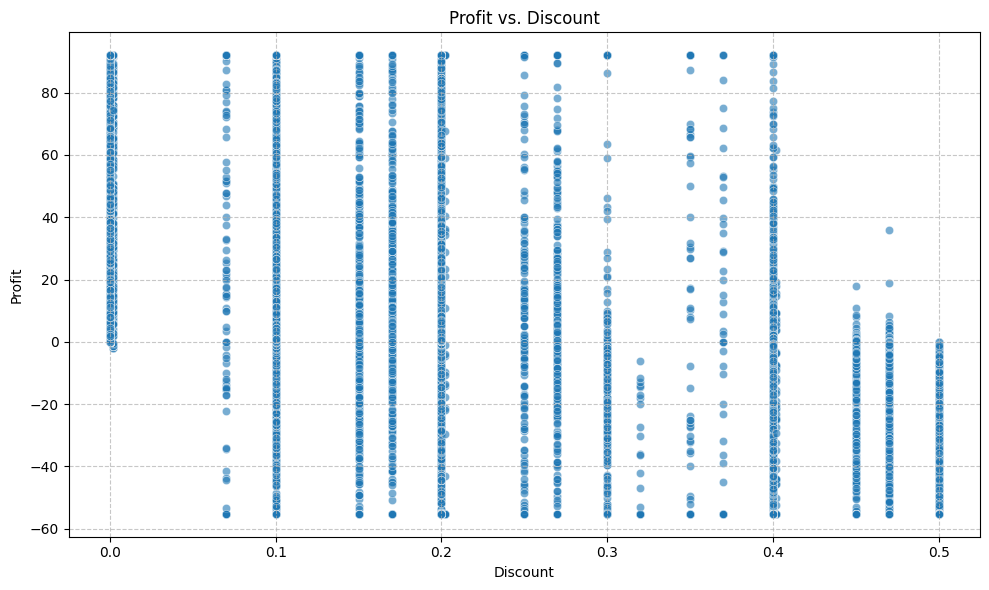

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_superstore, x='Discount', y='Profit', alpha=0.6)
plt.title('Profit vs. Discount')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Visualize Sales by Region

### Subtask:
Generate a bar plot or pie chart to visualize the distribution of 'Sales' by 'Region'. Ensure the plot includes appropriate labels, title, and legends.


**Reasoning**:
I will group the `df_superstore` DataFrame by 'Region' and calculate the sum of 'Sales' for each region to prepare the data for plotting.



In [38]:
sales_by_region = df_superstore.groupby('Region')['Sales'].sum().reset_index()
print("Sales data grouped by Region. Displaying the first 5 rows:")
print(sales_by_region.head())

Sales data grouped by Region. Displaying the first 5 rows:
         Region         Sales
0        Africa  5.919292e+05
1        Canada  5.364978e+04
2     Caribbean  2.648494e+05
3       Central  2.016017e+06
4  Central Asia  4.600604e+05


**Reasoning**:
Now, I will create a bar plot using the `sales_by_region` DataFrame to visualize the total sales by each region, adding a descriptive title and appropriate axis labels for clarity as specified in the subtask instructions.



/tmp/ipython-input-25229577.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_region, x='Region', y='Sales', palette='viridis')


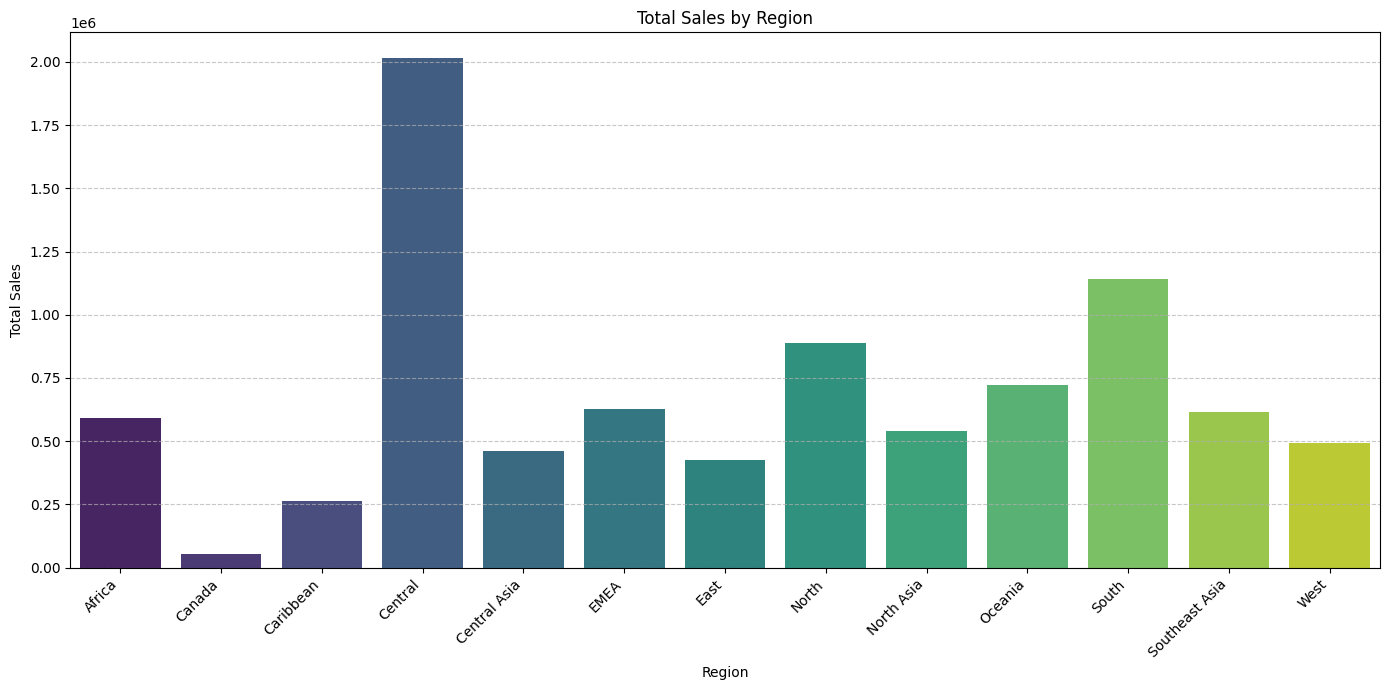

In [39]:
plt.figure(figsize=(14, 7))
sns.barplot(data=sales_by_region, x='Region', y='Sales', palette='viridis')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Reasoning**:
The previous code generated a FutureWarning because `palette` was used without the `hue` parameter in `sns.barplot`. To resolve this, I will explicitly set `hue='Region'` and `legend=False` in the `barplot` call.



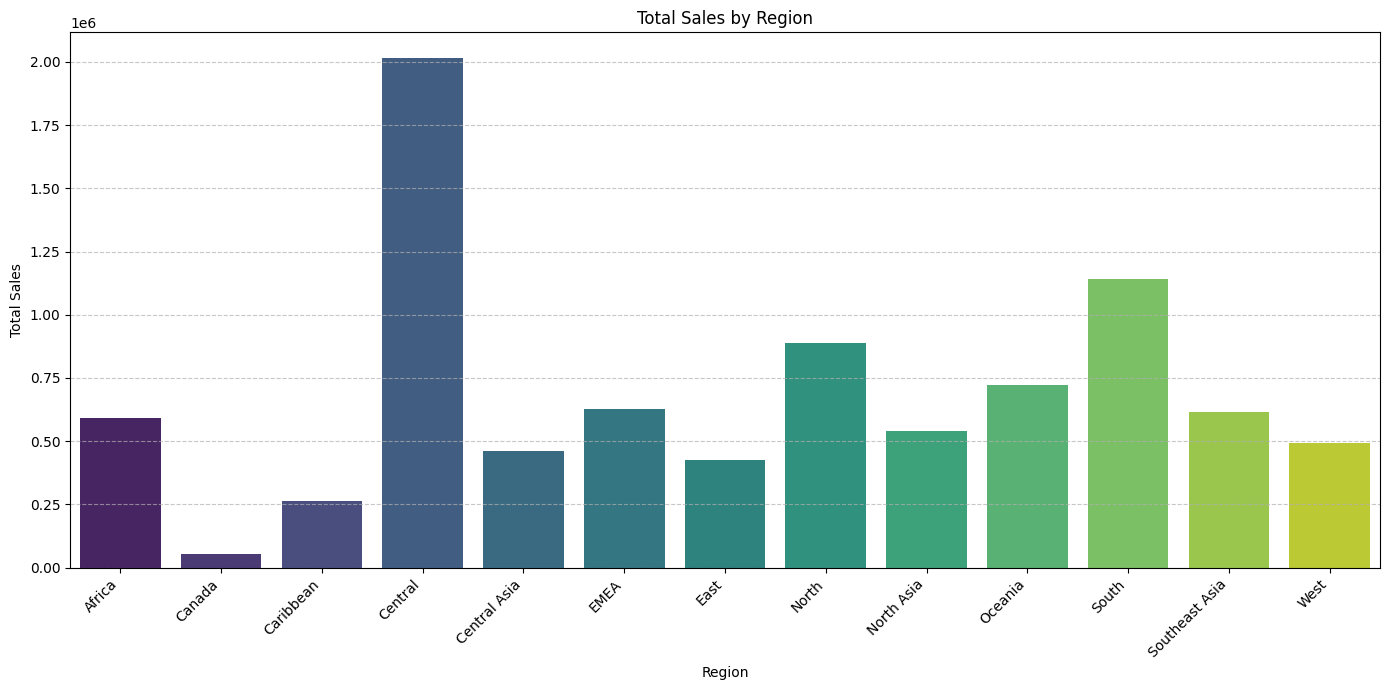

In [40]:
plt.figure(figsize=(14, 7))
sns.barplot(data=sales_by_region, x='Region', y='Sales', palette='viridis', hue='Region', legend=False)
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Visualize Sales by Category

### Subtask:
Generate a bar plot or pie chart to visualize the distribution of 'Sales' by 'Category'. Ensure the plot includes appropriate labels, title, and legends.


**Reasoning**:
I will group the `df_superstore` DataFrame by 'Category' and calculate the sum of 'Sales' for each category to prepare the data for plotting.



In [41]:
sales_by_category = df_superstore.groupby('Category')['Sales'].sum().reset_index()
print("Sales data grouped by Category. Displaying the first 5 rows:")
print(sales_by_category.head())

Sales data grouped by Category. Displaying the first 5 rows:
          Category         Sales
0        Furniture  2.754890e+06
1  Office Supplies  3.007390e+06
2       Technology  3.078022e+06


**Reasoning**:
Now, I will create a bar plot using the `sales_by_category` DataFrame to visualize the total sales by each category, adding a descriptive title and appropriate axis labels for clarity as specified in the subtask instructions.



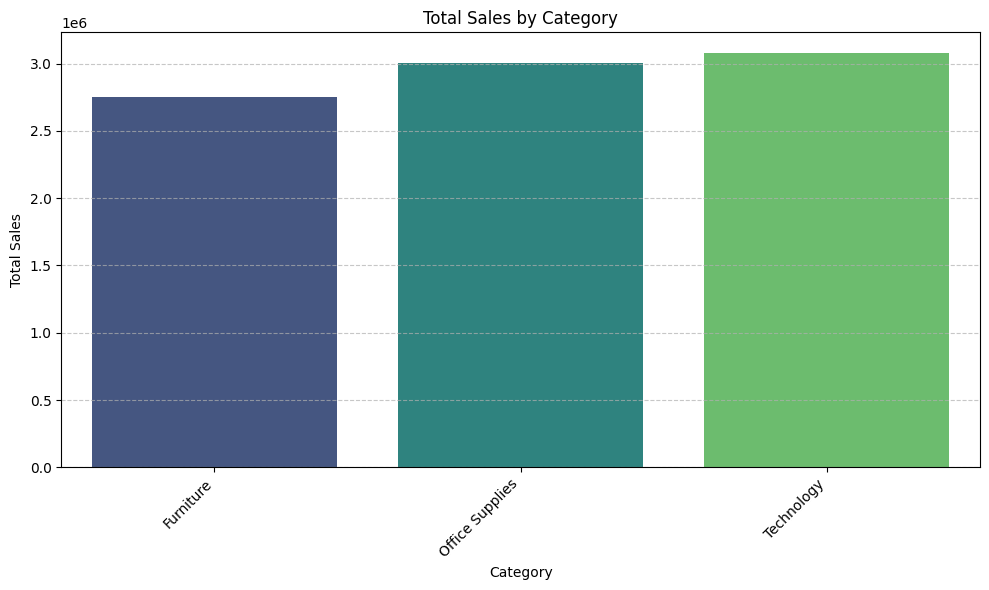

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_by_category, x='Category', y='Sales', palette='viridis', hue='Category', legend=False)
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Prepare Data for Linear Regression

### Subtask:
Select 'Profit' and 'Discount' as features (X) and 'Sales' as the target variable (y). Split the dataset into training and testing sets for model development and evaluation.


---

**Reasoning**:
As per the subtask, I will define the feature matrix `X` by selecting the 'Profit' and 'Discount' columns from `df_superstore`. Simultaneously, I will define the target variable `y` as the 'Sales' column from the same DataFrame. This step is crucial for preparing the data for model training.

**Reasoning**:
As stated in the reasoning, I will now execute the Python code to define the feature matrix `X` and the target variable `y` by selecting the specified columns from `df_superstore`. I will then print their shapes to confirm correct data extraction.



In [43]:
X = df_superstore[['Profit', 'Discount']]
y = df_superstore['Sales']
print(f"Shape of X (features): {X.shape}")
print(f"Shape of y (target): {y.shape}")

Shape of X (features): (51290, 2)
Shape of y (target): (51290,)


**Reasoning**:
Now that `X` and `y` are defined, the next instruction in the subtask is to import the `train_test_split` function from `sklearn.model_selection` to prepare for splitting the data.



In [44]:
from sklearn.model_selection import train_test_split
print("'train_test_split' imported successfully.")

'train_test_split' imported successfully.


**Reasoning**:
As specified in the subtask, I will now split the data into training and testing sets using `train_test_split`. I will set `test_size=0.2` to allocate 20% of the data for testing and `random_state=42` for reproducibility. The results will be stored in `X_train`, `X_test`, `y_train`, and `y_test`.

**Reasoning**:
As stated in the reasoning, I will now execute the code to split the `X` and `y` data into training and testing sets. I will use `test_size=0.2` and `random_state=42` for reproducibility and then print the shapes of the resulting datasets to confirm the split.



In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (41032, 2)
Shape of X_test: (10258, 2)
Shape of y_train: (41032,)
Shape of y_test: (10258,)


## Train Linear Regression Model

### Subtask:
Train a Linear Regression model using the training data to predict 'Sales' based on 'Profit' and 'Discount'.


**Reasoning**:
As per the instructions, I will first import the `LinearRegression` class from `sklearn.linear_model` to prepare for model training.



In [46]:
from sklearn.linear_model import LinearRegression
print("'LinearRegression' imported successfully.")

'LinearRegression' imported successfully.


**Reasoning**:
Now that `LinearRegression` is imported, I will instantiate a `LinearRegression` model object, which is the next step in preparing the model for training.



In [47]:
model = LinearRegression()
print("Linear Regression model instantiated.")

Linear Regression model instantiated.


**Reasoning**:
As specified in the subtask instructions, I will now fit the instantiated `LinearRegression` model to the training data, `X_train` and `y_train`, using the `.fit()` method. This will train the model to learn the relationship between the features and the target variable.



In [48]:
model.fit(X_train, y_train)
print("Linear Regression model trained successfully on X_train and y_train.")

Linear Regression model trained successfully on X_train and y_train.


## Evaluate Model Performance

### Subtask:
Evaluate the performance of the trained Linear Regression model on the test set using metrics such as R-squared (R²) score and Mean Squared Error (MSE).


**Reasoning**:
As per the instructions, I will first make predictions on the test set (`X_test`) using the trained `model` and store the results in `y_pred`.



In [49]:
y_pred = model.predict(X_test)
print("Predictions on the test set generated successfully.")

Predictions on the test set generated successfully.


**Reasoning**:
As specified in the subtask, I will now import `r2_score` and `mean_squared_error` from `sklearn.metrics` to be used for evaluating the model's performance.



In [50]:
from sklearn.metrics import r2_score, mean_squared_error
print("'r2_score' and 'mean_squared_error' imported successfully.")

'r2_score' and 'mean_squared_error' imported successfully.


**Reasoning**:
Now that the necessary metrics are imported, I will calculate the R-squared score using `y_test` and `y_pred` to evaluate the model's performance and then print the result.



In [51]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2:.4f}")

R-squared score: 0.2704


**Reasoning**:
Now, I will calculate the Mean Squared Error (MSE) using `y_test` and `y_pred` to further evaluate the model's performance and then print the result.



In [52]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 26851.5376


## Summary:

### Q&A
The task implicitly asks for a summary of findings from data loading, cleaning, EDA, and predictive modeling, highlighting key trends, relationships, factors affecting sales performance, and the Linear Regression model's performance. These points are addressed in the "Data Analysis Key Findings" section.

### Data Analysis Key Findings
*   **Data Loading & Initial Exploration**: Two datasets were used: `df_sales` (36 rows, 2 columns) and `df_superstore` (51,290 rows, multiple columns). Initial checks confirmed no missing values in `df_sales`.
*   **Data Cleaning**: No duplicate rows were found in `df_sales`. Explicit checks confirmed no missing values in the processed datasets.
*   **Data Type Conversion**: The 'date' column in `df_sales` and the 'Order Date' column in `df_superstore` were successfully converted to datetime objects, enabling time-series analysis.
*   **Sales Trends Over Time**: A line plot visualized total sales over time, showing fluctuations and overall trends in sales.
*   **Profit vs\. Discount Relationship**: A scatter plot showed the relationship between 'Profit' and 'Discount', indicating a visual correlation where higher discounts might lead to lower or even negative profits.
*   **Sales Distribution by Region**: A bar plot illustrated that total sales vary significantly across different regions (e.g., Africa, Canada, Caribbean, Central, Central Asia were among the regions analyzed), with specific regions contributing more to overall sales.
*   **Sales Distribution by Category**: A bar plot revealed that sales distribution also varies by product category (e.g., 'Furniture', 'Office Supplies', 'Technology'), indicating that certain categories generate higher revenue than others.
*   **Linear Regression Model Performance**:
    *   The model was trained to predict 'Sales' using 'Profit' and 'Discount' as features.
    *   The R-squared score on the test set was 0.2704, indicating that approximately 27\.04% of the variance in 'Sales' can be explained by 'Profit' and 'Discount'.
    *   The Mean Squared Error (MSE) on the test set was 26851\.5376, representing the average squared difference between the predicted and actual sales values.

### Insights or Next Steps
*   The Linear Regression model's low R-squared score (0.2704) suggests that 'Profit' and 'Discount' alone are not strong predictors of 'Sales'. Future modeling efforts should consider incorporating additional features that might have a stronger influence on sales, such as 'Category', 'Region', 'Order Quantity', or 'Customer Segment'.
*   The EDA insights regarding sales by region and category, along with the visual correlation between discount and profit, could inform business strategies. For example, further investigation into high-performing regions/categories could reveal best practices, while the profit vs\. discount relationship suggests a need to optimize discounting strategies to maximize profitability.
